In [119]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [241]:
data_in = pd.read_csv("https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_census_data.csv")

data_in

#https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_housing_data.csv

,NOM_CAS_AD,NO_CAS_ADM,OBJECTID,AreaSqKm,CentroidX,CentroidY,GridName,Key,Input_#2_Key,Count,Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid0_0,Caserne 03 Grid0_0,Caserne 03 Grid0_0,10.0,2.0,10.0,11430.107143,898.214286,100.0,71.550000,561.785714,890.714286
1,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid0_1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,14.0,2.0,14.0,11581.670000,675.000000,100.0,67.620000,399.000000,676.500000
2,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid1_0,Caserne 03 Grid1_0,Caserne 03 Grid1_0,35.0,6.0,35.0,5239.475000,1881.666667,100.0,87.500000,1285.000000,1873.333333
3,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid1_1,Caserne 03 Grid1_1,NaN,NaN,NaN,NaN,4877.600000,1205.000000,100.0,83.200000,790.000000,1212.500000
4,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid2_0,Caserne 03 Grid2_0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid1_2,caserne 47 Grid1_2,caserne 47 Grid1_2,40.0,7.0,40.0,12379.345161,496.129032,100.0,79.845161,322.903226,497.419355
1008,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid1_3,caserne 47 Grid1_3,caserne 47 Grid1_3,1.0,0.0,1.0,11015.133333,790.000000,100.0,82.183333,530.833333,795.000000
1009,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid2_0,caserne 47 Grid2_0,caserne 47 Grid2_0,5.0,1.0,5.0,6331.660000,556.000000,100.0,66.600000,369.000000,537.000000
1010,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid2_1,caserne 47 Grid2_1,NaN,NaN,NaN,NaN,7012.250000,506.666667,100.0,73.366667,334.166667,498.333333


In [249]:
data_hous = pd.read_csv("https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_housing_data.csv",  encoding='latin-1')

data_hous

#https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_housing_data.csv

,Grid,Caserne,Count,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT
0,caserne 47 Grid2_0,caserne 47,3,1.666667,1969.333333,Logement-Régulier
1,Caserne 50 Grid1_1,Caserne 50,1,2.000000,1957.000000,Logement-Régulier
2,Caserne 37 Grid3_3,Caserne 37,6,2.123288,1934.986301,Logement-Régulier
3,caserne 47 Grid0_3,caserne 47,7,2.108108,1934.729730,Logement-Régulier
4,Caserne 09 Grid4_4,Caserne 09,11,1.750000,1957.285714,Logement-Régulier
...,...,...,...,...,...,...
705,Caserne 46 Grid3_0,Caserne 46,2,1.812500,1950.812500,Logement-Régulier
706,Caserne 09 Grid7_7,Caserne 09,2,1.833333,1950.833333,Logement-Régulier
707,Caserne 29 Grid0_3,Caserne 29,6,1.464286,1987.928571,Logement-Condominium
708,Caserne 46 Grid1_3,Caserne 46,7,1.696970,1953.484848,Logement-Régulier


In [250]:
my_df = data_in.merge(data_hous, left_on = 'Key', right_on='Grid' )

In [251]:
my_df

,NOM_CAS_AD,NO_CAS_ADM,OBJECTID,AreaSqKm,CentroidX,CentroidY,GridName,Key,Input_#2_Key,Count_x,...,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Grid,Caserne,Count_y,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT
0,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid0_1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,14.0,...,100.0,67.620000,399.000000,676.500000,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
1,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid1_1,Caserne 03 Grid1_1,NaN,NaN,...,100.0,83.200000,790.000000,1212.500000,Caserne 03 Grid1_1,Caserne 03,3,1.000000,1986.400000,Logement-Condominium
2,Caserne 03,3,312,1.325306,-73.564826,45.490541,Grid2_0,Caserne 03 Grid2_0,NaN,NaN,...,NaN,NaN,NaN,NaN,Caserne 03 Grid2_0,Caserne 03,4,1.334746,1982.042373,Logement-Condominium
3,Caserne 04,4,357,5.474798,-73.648802,45.491405,Grid2_1,Caserne 04 Grid2_1,Caserne 04 Grid2_1,24.0,...,100.0,65.250000,258.125000,521.458333,Caserne 04 Grid2_1,Caserne 04,2,1.000000,1956.000000,"Service de garderie (prématernelle, moins de 5..."
4,Caserne 04,4,357,5.474798,-73.648802,45.491405,Grid3_1,Caserne 04 Grid3_1,Caserne 04 Grid3_1,41.0,...,100.0,67.723333,218.666667,445.666667,Caserne 04 Grid3_1,Caserne 04,14,1.228070,2008.350877,Logement-Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid1_2,caserne 47 Grid1_2,caserne 47 Grid1_2,40.0,...,100.0,79.845161,322.903226,497.419355,caserne 47 Grid1_2,caserne 47,9,1.916667,1940.666667,Logement-Régulier
185,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid1_3,caserne 47 Grid1_3,caserne 47 Grid1_3,1.0,...,100.0,82.183333,530.833333,795.000000,caserne 47 Grid1_3,caserne 47,10,1.928571,1952.089286,Logement-Régulier
186,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid2_0,caserne 47 Grid2_0,caserne 47 Grid2_0,5.0,...,100.0,66.600000,369.000000,537.000000,caserne 47 Grid2_0,caserne 47,3,1.666667,1969.333333,Logement-Régulier
187,caserne 47,47,317,3.712562,-73.594510,45.545179,Grid2_1,caserne 47 Grid2_1,NaN,NaN,...,100.0,73.366667,334.166667,498.333333,caserne 47 Grid2_1,caserne 47,6,1.885714,1959.057143,Logement-Régulier


In [252]:
my_df.describe()

,NO_CAS_ADM,OBJECTID,AreaSqKm,CentroidX,CentroidY,Count_x,Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Count_y,Avg_ETAGE_HORS,Avg_ANNEE_CONS
count,189.000000,189.000000,189.000000,189.000000,189.000000,135.000000,135.000000,135.000000,181.000000,173.000000,173.0,173.000000,173.000000,173.000000,189.000000,189.000000,189.000000
mean,30.190476,330.126984,5.898109,-73.582592,45.536839,19.518519,3.281481,19.518519,8403.374292,599.630307,100.0,70.346859,357.912635,598.805093,8.941799,1.808893,1957.033275
std,13.941966,19.037051,2.889767,0.042107,0.041051,18.607033,3.137762,18.607033,5200.870032,287.849588,0.0,7.025668,195.805083,290.183255,7.352941,0.606402,23.012424
min,3.000000,296.000000,1.312419,-73.716184,45.454464,1.000000,0.000000,1.000000,0.000000,255.000000,100.0,42.450000,142.500000,232.500000,1.000000,0.526316,1883.500000
25%,19.000000,315.000000,3.712562,-73.616668,45.503208,4.000000,1.000000,4.000000,4253.240000,473.548387,100.0,66.980000,265.555556,465.000000,4.000000,1.571429,1944.407407
50%,31.000000,327.000000,6.108486,-73.573585,45.536384,14.000000,2.000000,14.000000,8332.236364,513.166667,100.0,70.600000,305.000000,514.062500,7.000000,1.833333,1957.523810
75%,40.000000,351.000000,8.286967,-73.540674,45.567610,28.500000,5.000000,28.500000,12568.257143,599.000000,100.0,75.093333,359.230769,594.285714,12.000000,2.000000,1970.750000
max,72.000000,361.000000,20.297607,-73.507840,45.662233,76.000000,13.000000,76.000000,21857.075000,2300.000000,100.0,83.200000,1535.000000,2430.000000,42.000000,7.000000,2019.000000


In [253]:
#Clean data
Target_columns = ['Fire Count per Year', 'Fire Count 6 years', 'Avg_Pop__Densi', 'Avg_Income___T','Avg_Income___2', 'Avg_Income___3','Avg_Housing___','Avg_Education_', 'Avg_ETAGE_HORS', 'Avg_ANNEE_CONS', 'Mode_CATEGORIE_LIBELLE_UT']
data = my_df[Target_columns]
data = data.dropna()

In [254]:
data

,Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT
0,2.0,14.0,11581.670000,675.000000,100.0,67.620000,399.000000,676.500000,4.000000,1985.000000,Logement-Condominium
3,4.0,24.0,12434.895833,520.416667,100.0,65.250000,258.125000,521.458333,1.000000,1956.000000,"Service de garderie (prématernelle, moins de 5..."
4,7.0,41.0,16562.620000,439.833333,100.0,67.723333,218.666667,445.666667,1.228070,2008.350877,Logement-Condominium
6,9.0,54.0,8557.010000,809.000000,100.0,65.177778,533.500000,833.500000,0.750000,1953.250000,Logement-Condominium
7,0.0,1.0,3006.000000,2300.000000,100.0,79.900000,1535.000000,2430.000000,1.030303,1951.060606,Logement-Condominium
...,...,...,...,...,...,...,...,...,...,...,...
183,2.0,9.0,6064.525000,895.000000,100.0,82.812500,441.875000,858.125000,2.000000,1975.000000,Logement-Régulier
184,7.0,40.0,12379.345161,496.129032,100.0,79.845161,322.903226,497.419355,1.916667,1940.666667,Logement-Régulier
185,0.0,1.0,11015.133333,790.000000,100.0,82.183333,530.833333,795.000000,1.928571,1952.089286,Logement-Régulier
186,1.0,5.0,6331.660000,556.000000,100.0,66.600000,369.000000,537.000000,1.666667,1969.333333,Logement-Régulier


In [255]:
X = data.drop(['Fire Count per Year','Mode_CATEGORIE_LIBELLE_UT'], axis =1)
y = data['Fire Count per Year']

print(X.shape)
print(y.shape)

(132, 9)
(132,)


In [256]:
#Split into features and target

X = data.drop(['Fire Count per Year','Mode_CATEGORIE_LIBELLE_UT'], axis =1)
y = data['Fire Count per Year']

In [257]:
#Create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [258]:
X

,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_,Avg_ETAGE_HORS,Avg_ANNEE_CONS
0,14.0,11581.670000,675.000000,100.0,67.620000,399.000000,676.500000,4.000000,1985.000000
3,24.0,12434.895833,520.416667,100.0,65.250000,258.125000,521.458333,1.000000,1956.000000
4,41.0,16562.620000,439.833333,100.0,67.723333,218.666667,445.666667,1.228070,2008.350877
6,54.0,8557.010000,809.000000,100.0,65.177778,533.500000,833.500000,0.750000,1953.250000
7,1.0,3006.000000,2300.000000,100.0,79.900000,1535.000000,2430.000000,1.030303,1951.060606
...,...,...,...,...,...,...,...,...,...
183,9.0,6064.525000,895.000000,100.0,82.812500,441.875000,858.125000,2.000000,1975.000000
184,40.0,12379.345161,496.129032,100.0,79.845161,322.903226,497.419355,1.916667,1940.666667
185,1.0,11015.133333,790.000000,100.0,82.183333,530.833333,795.000000,1.928571,1952.089286
186,5.0,6331.660000,556.000000,100.0,66.600000,369.000000,537.000000,1.666667,1969.333333


Feature: 0, Score: 0.16542
Feature: 1, Score: 0.00001
Feature: 2, Score: -0.00225
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00365
Feature: 5, Score: -0.00068
Feature: 6, Score: 0.00310
Feature: 7, Score: 0.01052
Feature: 8, Score: -0.00038


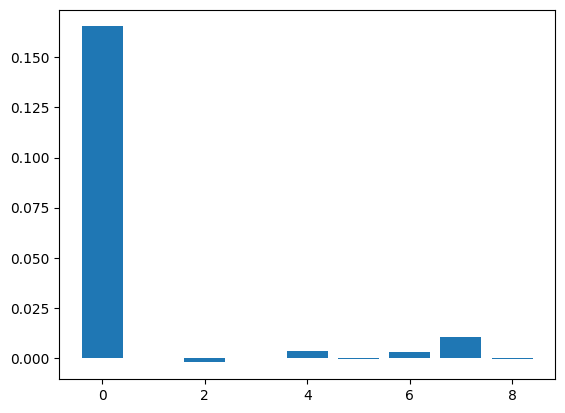

,features,feature_importance
0,Fire Count 6 years,1.654175e-01
7,Avg_ETAGE_HORS,1.051860e-02
4,Avg_Income___3,3.652006e-03
6,Avg_Education_,3.098433e-03
1,Avg_Pop__Densi,1.433479e-05
3,Avg_Income___2,1.019150e-17
8,Avg_ANNEE_CONS,-3.794031e-04
5,Avg_Housing___,-6.799833e-04
2,Avg_Income___T,-2.248123e-03


In [259]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot




#etrieve the coeff_ property that contains the coefficients found for each input variable.
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':model.coef_})



# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

feature_importances.sort_values('feature_importance',ascending=False)

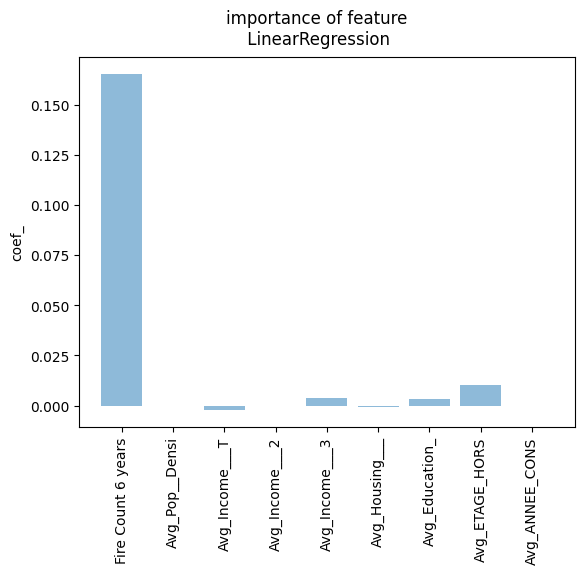

In [260]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(feature_importances.features))
performance = feature_importances.feature_importance

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, feature_importances.features, rotation='vertical')
plt.ylabel('coef_')
#plt.title('Feature importance')
plt.suptitle('importance of feature \n LinearRegression ')

plt.show()

In [214]:
import pandas as pd
import numpy as np
 
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer

model=RandomForestRegressor( bootstrap = True,random_state = 42,oob_score = True,)
 
model.fit(X_train,y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), 
                                                                                             model.oob_score_,
                                                                                             model.score(X_test, y_test)))

 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)


R^2 Training Score: 1.00 
OOB Score: 1.00 
R^2 Validation Score: 0.99


,features,feature_importance
0,Fire Count 6 years,0.988963
5,Avg_Housing___,0.004544
8,Avg_ANNEE_CONS,0.002142
6,Avg_Education_,0.001344
1,Avg_Pop__Densi,0.000881
4,Avg_Income___3,0.000805
7,Avg_ETAGE_HORS,0.000747
2,Avg_Income___T,0.000574
3,Avg_Income___2,0.000000


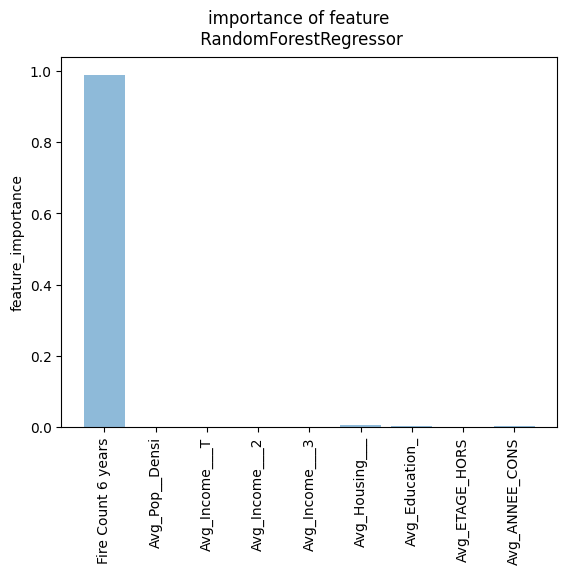

In [215]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(feature_importances.features))
performance = feature_importances.feature_importance

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, feature_importances.features, rotation='vertical')
plt.ylabel('feature_importance')
#plt.title('Feature importance')
plt.suptitle('importance of feature \n RandomForestRegressor ')

plt.show()

Text(0.5, 0, 'Random Forest Feature Importance Sort')

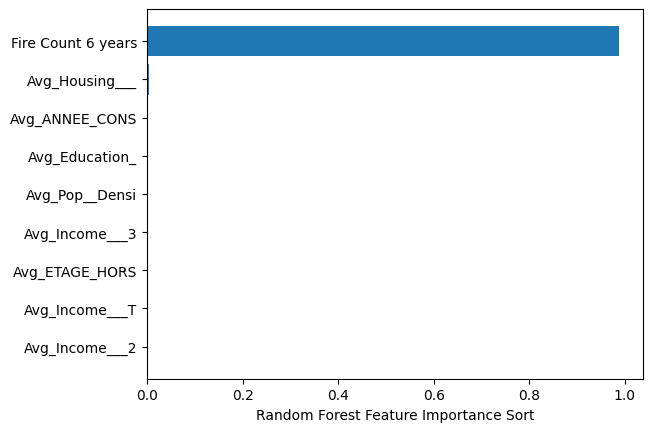

In [216]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(feature_importances.features[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance Sort")

In [217]:
model=XGBRegressor(n_estimators=1000, max_depth=7)
 
model.fit(X_train,y_train)
 
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':model.feature_importances_})
print(feature_importances.sort_values('feature_importance',ascending=False))

[19:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
             features  feature_importance
0  Fire Count 6 years                 1.0
1      Avg_Pop__Densi                 0.0
2      Avg_Income___T                 0.0
3      Avg_Income___2                 0.0
4      Avg_Income___3                 0.0
5      Avg_Housing___                 0.0
6      Avg_Education_                 0.0
7      Avg_ETAGE_HORS                 0.0
8      Avg_ANNEE_CONS                 0.0


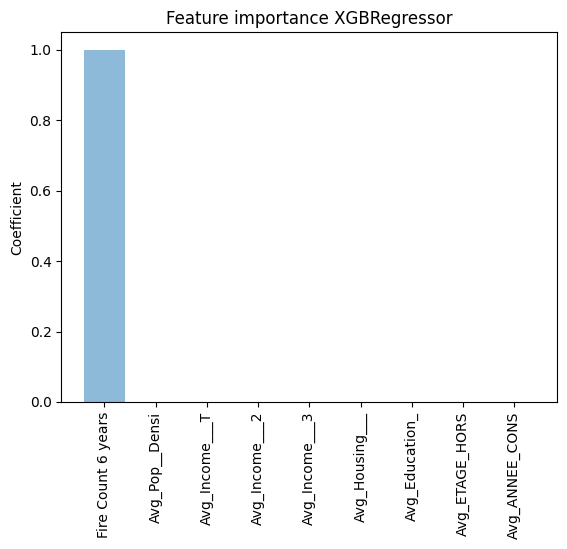

In [218]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(feature_importances.features))
performance = feature_importances.feature_importance

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, feature_importances.features, rotation='vertical')
plt.ylabel('Coefficient')
plt.title('Feature importance XGBRegressor')

plt.show()

                     Fire Count per Year  Fire Count 6 years  Avg_Pop__Densi  \
Fire Count per Year             1.000000            0.995419        0.529707   
Fire Count 6 years              0.995419            1.000000        0.521815   
Avg_Pop__Densi                  0.529707            0.521815        1.000000   
Avg_Income___T                 -0.157078           -0.166579       -0.304787   
Avg_Income___2                       NaN                 NaN             NaN   
Avg_Income___3                  0.073953            0.063335        0.004813   
Avg_Housing___                 -0.128405           -0.137843       -0.240544   
Avg_Education_                 -0.160481           -0.169671       -0.308284   
Avg_ETAGE_HORS                  0.103091            0.102335        0.106431   
Avg_ANNEE_CONS                 -0.187572           -0.181321       -0.286576   

                     Avg_Income___T  Avg_Income___2  Avg_Income___3  \
Fire Count per Year       -0.157078             

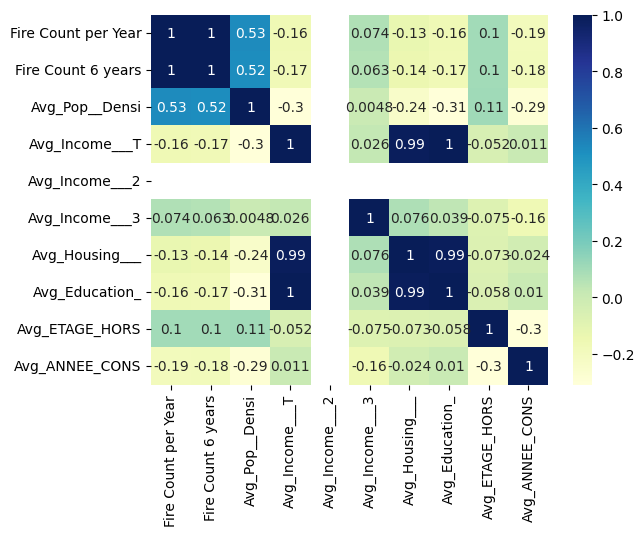

In [219]:

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  


  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [261]:


# Separate Target Variable and Predictor Variables
#TargetVariable=['Price']
#Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
 
X_=X.values
y_=y.values

print(X_)
print(y_)
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_)
TargetVarScalerFit=TargetVarScaler.fit([y_])
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X_)
y=TargetVarScalerFit.transform([y_])

print(X_.shape)
print(y_.shape)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[1.40000000e+01 1.15816700e+04 6.75000000e+02 ... 6.76500000e+02
  4.00000000e+00 1.98500000e+03]
 [2.40000000e+01 1.24348958e+04 5.20416667e+02 ... 5.21458333e+02
  1.00000000e+00 1.95600000e+03]
 [4.10000000e+01 1.65626200e+04 4.39833333e+02 ... 4.45666667e+02
  1.22807018e+00 2.00835088e+03]
 ...
 [1.00000000e+00 1.10151333e+04 7.90000000e+02 ... 7.95000000e+02
  1.92857143e+00 1.95208929e+03]
 [5.00000000e+00 6.33166000e+03 5.56000000e+02 ... 5.37000000e+02
  1.66666667e+00 1.96933333e+03]
 [7.00000000e+00 9.96978571e+03 5.20714286e+02 ... 5.27142857e+02
  1.98113208e+00 1.93520755e+03]]
[ 2.  4.  7.  9.  0.  3.  1.  0.  0.  4.  4.  7.  1.  4.  0.  3.  2.  0.
  0.  3. 10. 12.  0.  5. 10.  3. 12.  8.  4.  6.  0.  6.  2.  3.  2.  1.
  7.  1.  9.  2.  2. 12.  8. 10.  1.  2.  7.  1.  8.  0.  5.  1.  8. 13.
  1.  5.  9.  2.  5.  2.  6.  3.  4.  4.  0.  0.  5.  5.  2.  1.  6.  5.
  1.  0.  2.  7.  1.  2.  2.  2.  1.  2.  2.  0.  5.  0.  1.  0.  2.  3.
  4.  2.  3.  4.  4.  1.  4. 12.  2

In [267]:

# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 1000, verbose=1)

Epoch 1/1000
5/5 [==============================] - 1s 6ms/step - loss: 19.9453
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 19.7504
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 19.4621
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 19.0832
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 18.9071
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 18.7434
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 18.5802
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 18.4110
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 18.2398
Epoch 10/1000
5/5 [==============================] - 0s 4ms/step - loss: 18.0881
Epoch 11/1000
5/5 [==============================] - 0s 3ms/step - loss: 17.9170
Epoch 12/1000
5/5 [==============================] - 0s 4ms/step - loss: 17.7468
Epoch 13/1000
5/5 [==================

In [268]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -inf
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: -inf
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: -inf
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -inf
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: -inf
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -inf
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -inf
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: -inf
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: -inf
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: -inf
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: -inf
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: -inf
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: -inf
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: -inf
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: -inf
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: -inf


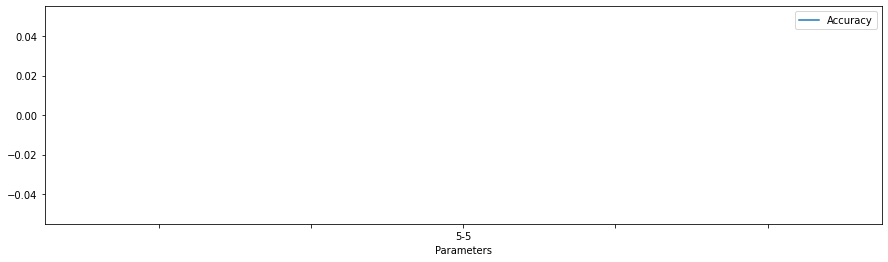

In [270]:

%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')